In [16]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../../wine_training.csv', delimiter = ";")
df.head()

,Unnamed: 0,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,Pinot noir,5.8,0.15,0.49,1.1,76.729301,894.94,186.639301,109.91,0.048,21.0,98.0,0.99290,3.19,0.48,9.2,5
1,1,Merlot,6.6,0.25,0.32,5.6,4.795712,1160.95,251.875712,247.08,0.039,15.0,68.0,0.99163,2.96,0.52,11.1,6
2,2,Chardonnay,6.7,0.21,0.34,1.5,85.193710,789.82,304.703710,219.51,0.035,45.0,123.0,0.98949,3.24,0.36,12.6,7
3,3,Merlot,8.3,0.28,0.27,17.5,11.976525,777.86,237.586525,225.61,0.045,48.0,253.0,1.00014,3.02,0.56,9.1,6
4,4,Merlot,7.5,0.42,0.19,6.9,5.599673,785.72,95.399673,89.80,0.041,62.0,150.0,0.99508,3.23,0.37,10.0,6


In [17]:
#import pipeline from scikit
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[])

# create a list of numerical and a list of categorical features

categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=[np.number]).columns

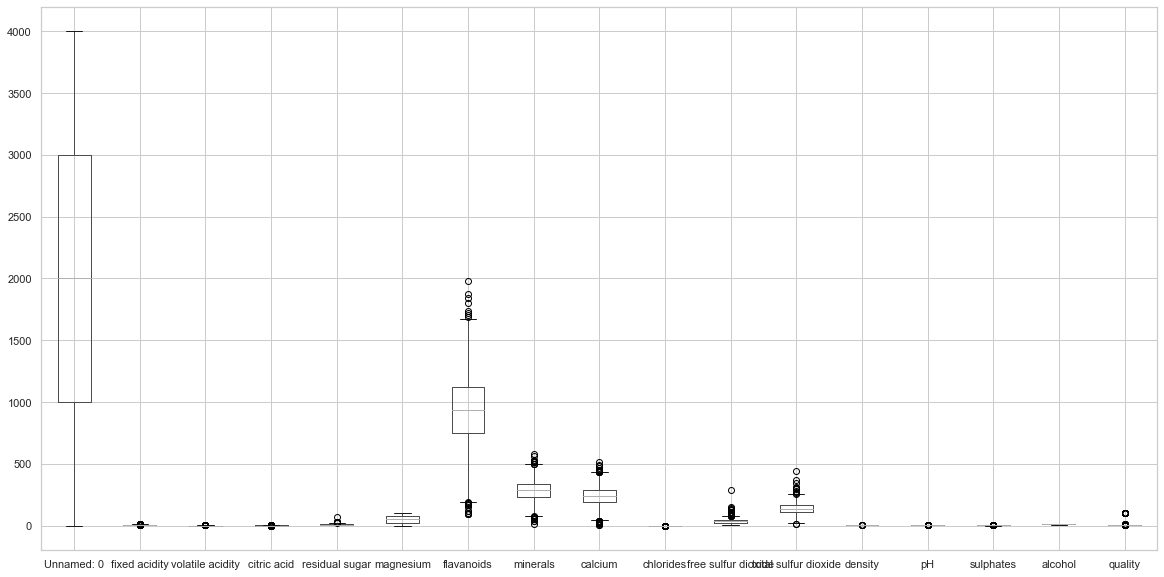

In [20]:
#Check for any outliers in the numerical features (fixed acidity, volatile acidity, citric acid, residual sugar, magnesium, flavanoids, minerals, calcium, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol) using box plots.
df[numerical_features].boxplot(figsize=(20,10))
plt.show()

In [22]:
#Check the IQR of the numerical features
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed: 0              1999.500000
fixed acidity              1.000000
volatile acidity           0.110000
citric acid                0.120000
residual sugar             8.200000
magnesium                 50.374377
flavanoids               371.077500
minerals                 104.474032
calcium                   97.047500
chlorides                  0.014000
free sulfur dioxide       23.000000
total sulfur dioxide      60.000000
density                    0.004400
pH                         0.190000
sulphates                  0.140000
alcohol                    1.900000
quality                    1.000000
dtype: float64


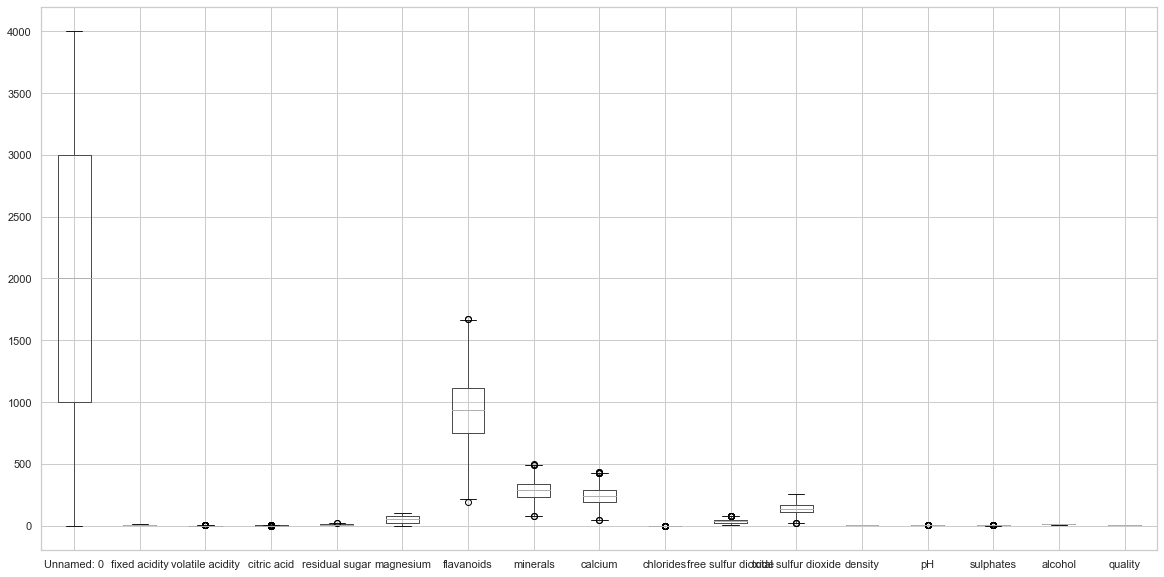

In [30]:
#Replace values that exceed the threshold with the average value
df[numerical_features] = np.where(df[numerical_features] < (Q1 - 1.5 * IQR), df[numerical_features].mean(), df[numerical_features])
df[numerical_features] = np.where(df[numerical_features] > (Q3 + 1.5 * IQR), df[numerical_features].mean(), df[numerical_features])

df[numerical_features].boxplot(figsize=(20,10))
plt.show()


In [31]:
from sklearn.preprocessing import FunctionTransformer

def outlier_detection(df):
    return df[numerical_features]

outlier_detection = FunctionTransformer(outlier_detection)

pipeline.steps.append(('outlier_detection', outlier_detection))

In [32]:
# simpleimputer for numerical features
from sklearn.impute import SimpleImputer

categorical_imputer = SimpleImputer(strategy="most_frequent")

numerical_imputer = SimpleImputer(strategy="mean")

In [33]:
#impute missing values
pipeline.steps.append(('categorical_imputer', categorical_imputer))
pipeline.steps.append(('numerical_imputer', numerical_imputer))
pipeline

Pipeline(steps=[('outlier_detection',
                 FunctionTransformer(func=<function outlier_detection at 0x7fc1737ebd30>)),
                ('categorical_imputer',
                 SimpleImputer(strategy='most_frequent')),
                ('numerical_imputer', SimpleImputer())])